<a href="https://colab.research.google.com/github/julianosfreitas/Machine-Learning-no-Campeonato-Brasileiro/blob/main/Previs%C3%A3o_Campeonato_Brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# importar bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV #from sklearn.feature_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

In [ ]:
# Ler o Arquivo BRA.scv 👀
data = pd.read_csv('/content/BRA.csv')
# Vizualizando os x primeiros items da tabela 🗒️
# display(data.head(20))
data.head(5)

In [ ]:
# Ver tipo as colunas 🏛️
data.info()

In [18]:
#Explorando os dados

matches = data.shape[0]

features = data.shape[1] -1 #Tirando a coluna Resultado

home_win = len(data[data.Res==1]) # Home Win = Quando na coluna Resultado o valor for igual a 1
away_win = len(data[data.Res==2]) # Away Win = Quando na coluna Resultado o valor for igual a 2
draw = len(data[data.Res==0]) # Draw = Quando na coluna Resultado o valor for igual a 0
val = [home_win, away_win, draw]

win_rate = (float(home_win)/(matches)) *100

print ('Total de Jogos: ', matches)
print ('Total de Colunas: ', features)
print ('Total de Jogos ganhos em casa: ', home_win)
print ('Total de Jogos ganhos pelo visitante: ', away_win)
print ('Total de Jogos empatados: ', draw)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format(win_rate))



Total de Jogos:  2279
Total de Colunas:  21
Total de Jogos ganhos em casa:  1133
Total de Jogos ganhos pelo visitante:  553
Total de Jogos empatados:  593
Percentual de jogos ganhos em casa: 49.71%


# ⚽ Algumas tendências interessantes:

**1** - **Vitórias em Casa** 🏠: A maioria dos jogos (**49,71%**) foram vencidos pelos times que jogaram em casa. Isso confirma o que muitos já dizem sobre a vantagem de jogar no próprio estádio, com o apoio da torcida e em um ambiente familiar.

**2** - **Desafios para os Visitantes** 🚶‍♂️: Os times visitantes ganharam apenas 553 partidas, o que representa cerca de **24,25%** do total. Isso me faz pensar no quão desafiador é para uma equipe se impor fora de casa, enfrentando o desgaste das viagens e a pressão da torcida adversária.

**3** - **Empates Frequentes** ⚖️: Achei interessante que 593 jogos (aproximadamente **26,03%**) terminaram empatados. Isso mostra que, mesmo com a vantagem de jogar em casa, muitos confrontos acabam equilibrados, sem um vencedor claro.

### Os resultados reforçam a ideia de que o fator casa realmente faz diferença no futebol ⚽

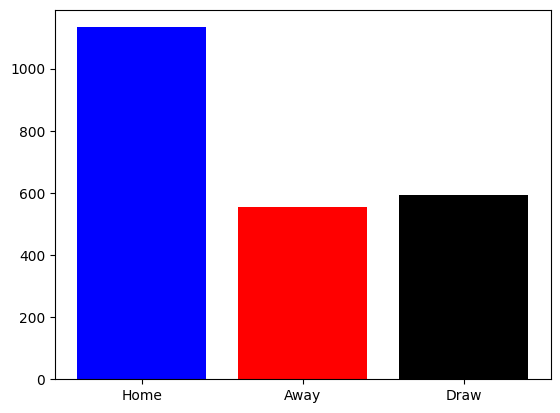

In [27]:
# Bora plotar ele

x = np.arange(3)  # Criamos um array com três posições (0, 1, 2) para as categorias 'Home', 'Away', e 'Draw'
plt.bar(x, val, color=['blue', 'red', 'black'])  # Plotando um gráfico de barras usando as posições do array x e os valores de 'val' e mudando a cor das barras
plt.xticks(x, ('Home', 'Away', 'Draw'))  # Define os rótulos do eixo x para as categorias correspondentes
plt.show()

In [29]:
# Vamo preparar os dados

num_data = data.drop(['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away'], axis=1)  # Remove as colunas que não são numéricas do DataFrame 'data'
display(num_data.head())  # Exibe as primeiras linhas do DataFrame 'num_data' para dar uma olhada nos dados restantes


,game_id,home_id,Away_id,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1,21,21,1,1,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2,27,27,1,1,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,3,13,13,2,1,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,4,7,7,4,2,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,5,9,9,0,1,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [37]:
# Agora vamo separas as *FEATURES* (entrada)
features = num_data.drop(['Res'], axis=1)

# as *LABELS* (saida)
labels = num_data['Res']

print('Features')
print(features.head())
print('-------------------------------------------------------------------------')
print('Labels')
print(labels.head())


Features
   game_id  home_id  Away_id  HG  AG    PH    PD    PA  MaxH  MaxD  MaxA  \
0        1       21       21   1   1  1.75  3.86  5.25  1.76  3.87  5.31   
1        2       27       27   1   1  2.83  3.39  2.68  2.83  3.42  2.70   
2        3       13       13   2   1  1.60  4.04  6.72  1.67  4.05  7.22   
3        4        7        7   4   2  2.49  3.35  3.15  2.49  3.39  3.15   
4        5        9        9   0   1  1.96  3.53  4.41  1.96  3.53  4.41   

   AvgH  AvgD  AvgA  
0  1.69  3.50  4.90  
1  2.59  3.23  2.58  
2  1.59  3.67  5.64  
3  2.35  3.26  2.84  
4  1.89  3.33  3.89  
-------------------------------------------------------------------------
Labels
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


In [41]:
# Escolhenco as melhores features com Kbest

features_list = ('HG','AG','PH','PD','PA','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features: ")
print(k_best_features_final)


Melhores features: 
{'PA': 740.4065621193932, 'MaxH': 731.7074700471329, 'MaxD': 81.51748572743963, 'AvgD': 80.67054047107476, 'AvgH': 63.290872018071454, 'MaxA': 40.62018755299711, 'AvgA': 40.54491193487282, 'AG': 0.6533077251586757, 'PD': 0.027363118243961364, 'PH': 0.027363118243961364}


In [44]:
from sklearn.feature_selection import SelectKBest

# Escolhendo as melhores features com KBest
features_list = ('HG', 'AG', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA')

# Cria o seletor para escolher as melhores features
k_best_features = SelectKBest(k='all')

# Ajusta o seletor com os dados de features e labels
k_best_features.fit_transform(features, labels)  # Corrigido de fit_trasform para fit_transform

# Obtém os scores das features
k_best_features_scores = k_best_features.scores_

# Cria uma lista de pares (nome da feature, score) e a ordena em ordem decrescente pelos scores
raw_pairs = zip(features_list, k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

# Seleciona as top 15 features com os maiores scores
k_best_features_final = dict(ordered_pairs[:15])

# Extrai os nomes das melhores features
best_features = k_best_features_final.keys()

print('')
print("Melhores features: ")
print(k_best_features_final)



Melhores features: 
{'PD': 740.4065621193932, 'PA': 731.7074700471329, 'MaxH': 81.51748572743963, 'AvgH': 80.67054047107476, 'AvgA': 68.70262760245139, 'MaxA': 63.290872018071454, 'MaxD': 40.62018755299711, 'AvgD': 40.54491193487282, 'HG': 0.6533077251586757, 'PH': 0.027363118243961364, 'AG': 0.027363118243961364}


In [47]:
# Separa as features com base nos melhores features para treinamento
fatures = num_data.drop(['Res','game_id','Away_id','AG','PH'], axis=1)

# Separar as labels para treinamento
labels = num_data['Res']

print('Features')
print(features.head())

print('-----------------------------------------------------------------')

print('Labels')
print(labels.head())

Features
   game_id  home_id  Away_id  HG  AG    PH    PD    PA  MaxH  MaxD  MaxA  \
0        1       21       21   1   1  1.75  3.86  5.25  1.76  3.87  5.31   
1        2       27       27   1   1  2.83  3.39  2.68  2.83  3.42  2.70   
2        3       13       13   2   1  1.60  4.04  6.72  1.67  4.05  7.22   
3        4        7        7   4   2  2.49  3.35  3.15  2.49  3.39  3.15   
4        5        9        9   0   1  1.96  3.53  4.41  1.96  3.53  4.41   

   AvgH  AvgD  AvgA  
0  1.69  3.50  4.90  
1  2.59  3.23  2.58  
2  1.59  3.67  5.64  
3  2.35  3.26  2.84  
4  1.89  3.33  3.89  
-----------------------------------------------------------------
Labels
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


In [48]:
# Normalizando os dados de entrada(features)

#gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print ('Features: ', features_scale.shape)
print (features_scale)

Features:  (2279, 14)
[[0.00000000e+00 7.14285714e-01 7.14285714e-01 ... 8.23909532e-02
  1.59459459e-01 2.69200931e-01]
 [4.38981563e-04 9.28571429e-01 9.28571429e-01 ... 2.27786753e-01
  8.64864865e-02 8.92164469e-02]
 [8.77963126e-04 4.28571429e-01 4.28571429e-01 ... 6.62358643e-02
  2.05405405e-01 3.26609775e-01]
 ...
 [9.99122037e-01 9.28571429e-01 9.28571429e-01 ... 3.06946688e-02
  5.05405405e-01 4.88750970e-01]
 [9.99561018e-01 9.64285714e-01 9.64285714e-01 ... 2.42326333e-02
  5.13513514e-01 6.08223429e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.58319871e-01
  1.37837838e-01 1.40418929e-01]]


In [54]:
# Separa em treinamento e teste
# Separação manual para manter a ordem cronológica, uma vez que temos informação tempral.
# Treino linhas [:1932]
# Treino Linhas [1932:2155]
# previsão Linhas [2155:2280]

X_train = features_scale[:1932]
X_test = features_scale[1932:2155]
y_train = labels[:1932]
y_test = labels[1932:2155]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))


1932 1932
223 223


In [59]:
# Treinando e testando os modelos
print('LogisticRegression :)')

clf_LR = LogisticRegression(multi_class='multinomial',max_iter=200)
clf_LR.fit(X_train, y_train)
pred = clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test, pred, average = 'micro')
print('Acurácia LogisticRegression:{}'.format(lg_acc))
print('F1 Score:{}'.format(f1))

LogisticRegression :)
Acurácia LogisticRegression:1.0
F1 Score:1.0
